# Regression_discontinuity_analysis_on_bank_debits_using_regression

# Problem Statement :
    After a debt has been legally declared "uncollectable" by a bank, the account is considered to be "charged-off." But that doesn't mean the bank simply walks away from the debt. They still want to collect some of the money they are owed. The bank will score the account to assess the expected recovery amount, that is, the expected amount that the bank may be able to receive from the customer in the future (for a fixed time period such as one year). This amount is a function of the probability of the customer paying, the total debt, and other factors that impact the ability and willingness to pay.

In [3]:
#Import the dataset

import pandas as pd
import numpy as np

bank_data = pd.read_csv("C:/Users/USer/Regression-Discontinuity-Analysis-on-Bank-Debits/bank_data.csv")

In [3]:
# View the structure of dataset

bank_data.shape

(1882, 6)

The dataset contains 1882 rows with 6 columns

In [4]:
# View the sample of dataset

bank_data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [5]:
# Basic Information

bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [6]:
#Describe the dataset

bank_data.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


# Data Cleaning

In [7]:
# check if the dataset contains any null values

bank_data.isnull().sum()


id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [8]:
# Check duplicates in the dataset

bank_data.duplicated().sum()

0

In [9]:
# Check the unique values in categorical columns
bank_data['sex'].unique()

array(['Male', 'Female'], dtype=object)

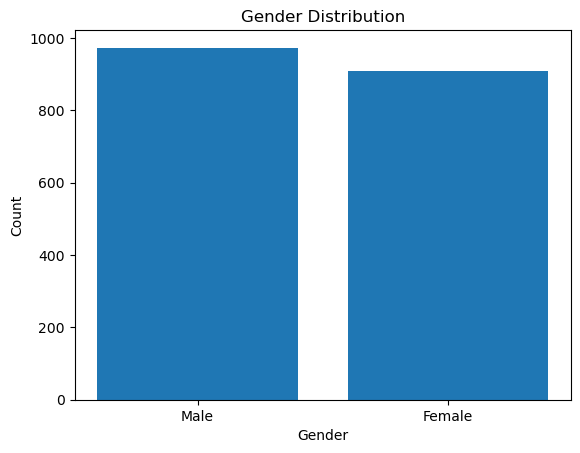

In [14]:
# Bar graph using matplotlib
import matplotlib.pyplot as plt
gender_counts = bank_data['sex'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


<AxesSubplot:xlabel='sex', ylabel='expected_recovery_amount'>

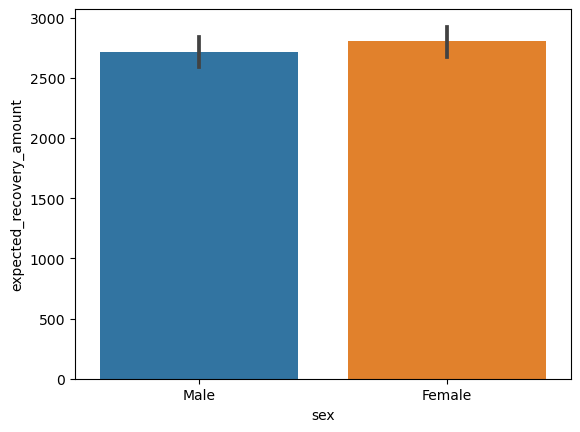

In [10]:

import seaborn as sns
sns.barplot(x=bank_data['sex'], 
                y=bank_data['expected_recovery_amount']) 


In [29]:
bank_data['recovery_strategy'].unique()

array(['Level 0 Recovery', 'Level 1 Recovery', 'Level 2 Recovery',
       'Level 3 Recovery', 'Level 4 Recovery'], dtype=object)

<AxesSubplot:xlabel='recovery_strategy', ylabel='Count'>

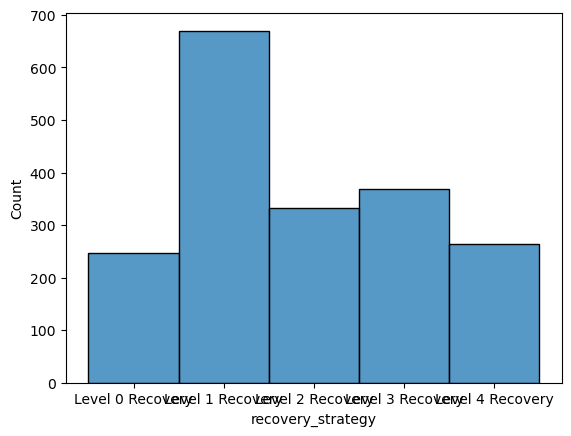

In [18]:
# Visualise the count by recovery_stage
import seaborn as sns
sns.histplot(bank_data, x='recovery_strategy') 

# Graphical exploratory data analysis


The bank has implemented different recovery strategies at different thresholds ($1000, $2000, $3000 and $5000) where the greater the Expected Recovery Amount, the more effort the bank puts into contacting the customer. Zeroing in on the first transition (between Level 0 and Level 1) means we are focused on the population with Expected Recovery Amounts between $0 and $2000 where the transition between Levels occurred at $1000. We know that the customers in Level 1 (expected recovery amounts between $1001 and $2000) received more attention from the bank and, by definition, they had higher Expected Recovery Amounts than the customers in Level 0 (between $1 and $1000).

Here's a quick summary of the Levels and thresholds again:
Level 0: Expected recovery amounts >$0 and <=$1000
Level 1: Expected recovery amounts >$1000 and <=$2000
The threshold of $1000 separates Level 0 from Level 1

A key question is whether there are other factors besides Expected Recovery Amount that also varied systematically across the $1000 threshold. For example, does the customer age show a jump (discontinuity) at the $1000 threshold or does that age vary smoothly? We can examine this by first making a scatter plot of the age as a function of Expected Recovery Amount for a small window of Expected Recovery Amount, $0 to $2000. This range covers Levels 0 and 1.

# Statistical test: age vs. expected recovery amount

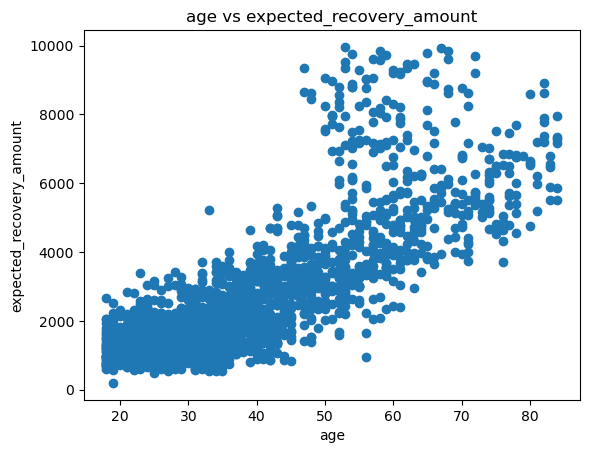

In [16]:
# Scatter plot using matplotlib
import matplotlib.pyplot as plt
plt.scatter(bank_data["age"], bank_data["expected_recovery_amount"])         
plt.title("age vs expected_recovery_amount")
plt.xlabel("age")
plt.ylabel("expected_recovery_amount")
plt.show()

In [4]:
# Kruskal-Wallis H Test

import scipy.stats as stats

# Compute average age just below and above the threshold
era_900_1100 = bank_data.loc[(bank_data['expected_recovery_amount'] < 1100) &
                      (bank_data['expected_recovery_amount'] >= 900)]
by_recovery_strategy = era_900_1100.groupby(['recovery_strategy'])
by_recovery_strategy['age'].describe().unstack()
 
# Data to be tested
Level_0_age = era_900_1100.loc[bank_data['recovery_strategy']=="Level 0 Recovery"]['age']
Level_1_age = era_900_1100.loc[bank_data['recovery_strategy']=="Level 1 Recovery"]['age']

# Perform the Kruskal-Wallis H Test
h_statistic, p_value = stats.kruskal(Level_0_age, Level_1_age)
 
# Output the results
print(f"H Statistic: {h_statistic}")
print(f"P-Value: {p_value}")
 
# Evaluate the hypothesis
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference between the groups.")

H Statistic: 3.4572342749517513
P-Value: 0.06297556896097407
We fail to reject the null hypothesis. There is no significant difference between the groups.


# Statistical test: sex vs. expected recovery amount

We were able to convince ourselves that there is no major jump in the average customer age just above and just below the $1000 threshold by doing a statistical test as well as exploring it graphically with a scatter plot.
We want to also test that the percentage of customers that are male does not jump as well across the $1000 threshold. We can start by exploring the range of $900 to $1100 and later adjust this range.

In [33]:
# Number of customers in each category
crosstab = pd.crosstab(bank_data.loc[(bank_data['expected_recovery_amount']<1100) & 
                              (bank_data['expected_recovery_amount']>=900)]['recovery_strategy'], 
                       bank_data['sex'])
print(crosstab)

# Chi-square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab)
p_val

sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       39    55


0.5377947810444592

# Exploratory graphical analysis: recovery amount

We are now reasonably confident that customers just above and just below the $1000 threshold are, on average, similar in terms of their average age and the percentage that are male.
It is now time to focus on the key outcome of interest, the actual recovery amount.
A first step in examining the relationship between the actual recovery amount and the expected recovery amount is to develop a scatter plot where we want to focus our attention at the range just below and just above the threshold. Specifically, we will develop a scatter plot of Expected Recovery Amount (Y) vs. Actual Recovery Amount (X) for Expected Recovery Amounts between $900 to $1100. This range covers Levels 0 and 1. A key question is whether or not we see a discontinuity (jump) around the $1000 threshold.

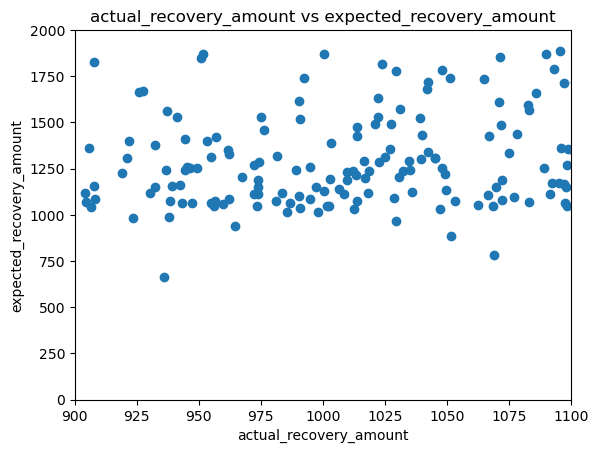

In [40]:
# Scatter plot using matplotlib
import matplotlib.pyplot as plt
plt.scatter(bank_data["actual_recovery_amount"], bank_data["expected_recovery_amount"])  
plt.xlim(900, 1100)
plt.ylim(0, 2000)
plt.title("actual_recovery_amount vs expected_recovery_amount")
plt.xlabel("actual_recovery_amount")
plt.ylabel("expected_recovery_amount")
plt.show()



     

# Statistical analysis: recovery amount

As we did with age, we can perform statistical tests to see if the actual recovery amount has a discontinuity above the $1000 threshold. We are going to do this for two different windows of the expected recovery amount $900 to $1100 and for a narrow range of $950 to $1050 to see if our results are consistent.

Again, we will use the Kruskal-Wallis test.

We will first compute the average actual recovery amount for those customers just below and just above the threshold using a range from $900 to $1100. Then we will perform a Kruskal-Wallis test to see if the actual recovery amounts are different just above and just below the threshold. Once we do that, we will repeat these steps for a smaller window of $950 to $1050.



In [7]:
# Compute average actual recovery amount just below and above the threshold
by_recovery_strategy['actual_recovery_amount'].describe().unstack()

# Perform Kruskal-Wallis test
Level_0_actual = era_900_1100.loc[bank_data['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = era_900_1100.loc[bank_data['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
print(stats.kruskal(Level_0_actual,Level_1_actual)) 

# Repeat for a smaller range of $950 to $1050
era_950_1050 = bank_data.loc[(bank_data['expected_recovery_amount']<1050) & 
                      (bank_data['expected_recovery_amount']>=950)]
Level_0_actual = era_950_1050.loc[bank_data['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = era_950_1050.loc[bank_data['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']

print(stats.kruskal(Level_0_actual,Level_1_actual)) 

KruskalResult(statistic=65.37966302528878, pvalue=6.177308752803109e-16)
KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)


# Regression modeling: no threshold

We now want to take a regression-based approach to estimate the program impact at the $1000 threshold using data that is just above and below the threshold.

We will build two models. The first model does not have a threshold while the second will include a threshold.

The first model predicts the actual recovery amount (dependent variable) as a function of the expected recovery amount (independent variable). We expect that there will be a strong positive relationship between these two variables.

We will examine the adjusted R-squared to see the percent of variance explained by the model. In this model, we are not representing the threshold but simply seeing how the variable used for assigning the customers (expected recovery amount) relates to the outcome variable (actual recovery amount).

In [8]:
# Import statsmodels
import statsmodels.api as sm

# Define X and y
X = era_900_1100['expected_recovery_amount']
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Mon, 22 Jan 2024   Prob (F-statistic):           1.56e-13
Time:                            11:31:15   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
expected_recovery_amount     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression modeling: adding true threshold

From the first model, we see that the regression coefficient is statistically significant for the expected recovery amount and the adjusted R-squared value was about 0.26. As we saw from the graph, on average the actual recovery amount increases as the expected recovery amount increases. We could add polynomial terms of expected recovery amount (such as the squared value of expected recovery amount) to the model but, for the purposes of this practice, let's stick with using just the linear term.
The second model adds an indicator of the true threshold to the model. If there was no impact of the higher recovery strategy on the actual recovery amount, then we would expect that the relationship between the expected recovery amount and the actual recovery amount would be continuous.

In [10]:
# Create indicator (0 or 1) for expected recovery amount >= $1000
bank_data['indicator_1000'] = np.where(bank_data['expected_recovery_amount']<1000, 0, 1)
era_900_1100 = bank_data.loc[(bank_data['expected_recovery_amount']<1100) & 
                      (bank_data['expected_recovery_amount']>=900)]

# Define X and y
X = era_900_1100[['expected_recovery_amount', 'indicator_1000']]
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Mon, 22 Jan 2024   Prob (F-statistic):           1.83e-15
Time:                            11:39:14   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.3440    626.274      0.005      0.996   -1232.440    1239.128
expected_recovery_amount     0.6430      0.655      0.981      0.328      -0.650       1.936
indicator_1000             277.6344     74.043      3.750      0.000     131.530     423.739
==============================================================================
Omnibus:                       65.977   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.537
Skew:                           1.510   Prob(JB):                     3.12e-41
Kurtosis:                       6.917   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression modeling: adjusting the window

The regression coefficient for the true threshold was statistically significant with an estimated impact of around $278 and a 95 percent confidence interval of $132 to $424. This is much larger than the incremental cost of running the higher recovery strategy which was $50 per customer. At this point, we are feeling reasonably confident that the higher recovery strategy is worth the additional costs of the program for customers just above and just below the threshold.

Before showing this to our managers, we want to convince ourselves that this result wasn't due just to us choosing a window of $900 to $1100 for the expected recovery amount. If the higher recovery strategy really had an impact of an extra few hundred dollars, then we should see a similar regression coefficient if we choose a slightly bigger or a slightly smaller window for the expected recovery amount. Let's repeat this analysis for the window of expected recovery amount from $950 to $1050 to see if we get similar results.

In [11]:
# Redefine era_950_1050 so the indicator variable is included
era_950_1050 = bank_data.loc[(bank_data['expected_recovery_amount']<1050) & 
                      (bank_data['expected_recovery_amount']>=950)]

# Define X and y 
X = era_950_1050[['expected_recovery_amount','indicator_1000']]
y = era_950_1050['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Mon, 22 Jan 2024   Prob (F-statistic):           1.12e-07
Time:                            11:42:54   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -279.5243   1840.707     -0.152      0.880   -3933.298    3374.250
expected_recovery_amount     0.9189      1.886      0.487      0.627      -2.825       4.663
indicator_1000             286.5337    111.352      2.573      0.012      65.502     507.566
==============================================================================
Omnibus:                       39.302   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.258
Skew:                           1.564   Prob(JB):                     1.37e-18
Kurtosis:                       6.186   Cond. No.                     6.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""